# This notebook is a test of KNN algorithm

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('df_to_recommender.csv')

In [22]:
df.head()

,Unnamed: 0,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,...,year,user_id,beers_by_day,more_beers_than_10,too_much_beers,rate_recode,num_rated_beers,user_recode,beers_rated_by_user,enough_beers_rated
0,1065,Barrel Aged 2 Turtle Doves,63725,16866,13.0,Belgian Strong Dark Ale,4.5,4.5,4.0,5.0,...,2011,13938,1,0,0,1,561,1,1,0
1,1089,"Provisions Series, Cuádruple",65937,16866,10.0,Quadrupel (Quad),4.5,3.5,4.0,4.0,...,2011,13938,1,0,0,1,561,1,1,0
2,1114,"Provisions Series, The Workman's Friend",63413,16866,7.5,American Porter,4.0,4.0,4.0,4.0,...,2011,13938,3,0,0,1,561,1,1,0
3,1355,Key West Southernmost Wheat,42311,161,99.0,Witbier,3.5,4.0,3.5,4.0,...,2011,13938,5,0,0,1,561,1,1,0
4,1356,Southport Palace Pilsener,23163,5578,99.0,Czech Pilsener,4.0,4.0,4.0,4.0,...,2011,13938,5,0,0,1,561,1,1,0


In [23]:
df.shape

(7771, 27)

In [24]:
from sklearn.cross_validation import train_test_split

In [25]:
X = df[['overall', 'user_id']]
y = df['names']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [27]:
print (X_train.shape)
print (X_test.shape)

(5206, 2)
(2565, 2)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
clf = KNeighborsClassifier(n_neighbors=20,)

In [30]:
clf.fit(X,y)
# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(clf.predict(X_test), y_test)

0.036647173489278755

In [33]:
clf.predict(X_test)

array([' Anniversary Ale', ' Alpirsbacher Klosterbr\xc3\xa4u Spezial',
       ' Alvinne Blond Extra', ..., ' Battery Hill Bitter',
       ' Blueberry Wheat Beer', ' 2011 Christmas Ale'], dtype=object)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [36]:
accuracy_score(clf.predict(X_test), y_test)

0.036647173489278755

(array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.00000000e+00,   2.77085065e-05,   5.54170130e-05,
          8.31255195e-05,   1.10834026e-04,   1.38542533e-04,
          1.66251039e-04,   1.93959546e-04,   2.21668052e-04,
          2.49376559e-04,   2.77085065e-04]),
 <a list of 10 Patch objects>)

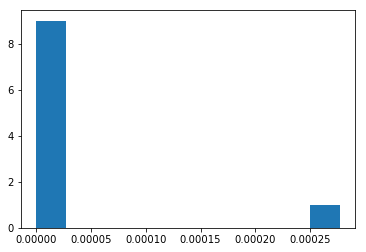

In [37]:
plt.hist (cross_val_score(clf, X,y, cv=10))